In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [17]:
max_words=10000

In [18]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_words)

In [19]:
maxlen = 200

In [20]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

In [21]:
X_train[5002]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,  103,   51,   13,  197,   16,    6, 4796,
        239,    7,  107,  555,   11,  132,   39, 8921, 1872,  138,   16,
       4093, 1768, 2959,   34, 1620,    2,   11,    4,  755,   12,   43,
        286,    4,  172,  209,    2,    5, 5938,   17, 1000,   34, 1768,
        279,   29, 3892,   89,  338,    4,  114,   16, 1240, 1747,  103,
       3844, 3819,    8,  169, 2875,  112, 7062,   34,  160,  132,   29,
        100,   24,  535,  101,  250,    8,  858,   15,  196,   19,   57,
       3154,   39,   90,    5,   24,  169, 3533,   

In [22]:
###Create NN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, 8, input_length=maxlen))
model.add(tf.keras.layers.Conv1D(100, 5, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(200, 5, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 8)            80000     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 196, 100)          4100      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 98, 100)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 94, 200)           100200    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 47, 200)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [25]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/5
176/176 [==============================] - 13s 77ms/step - loss: 0.4774 - accuracy: 0.7390 - val_loss: 0.3182 - val_accuracy: 0.8720
Epoch 2/5
176/176 [==============================] - 14s 79ms/step - loss: 0.2260 - accuracy: 0.9102 - val_loss: 0.3000 - val_accuracy: 0.8772
Epoch 3/5
176/176 [==============================] - 13s 77ms/step - loss: 0.1652 - accuracy: 0.9395 - val_loss: 0.3285 - val_accuracy: 0.8768
Epoch 4/5
176/176 [==============================] - 13s 74ms/step - loss: 0.1189 - accuracy: 0.9585 - val_loss: 0.3910 - val_accuracy: 0.8696
Epoch 5/5
176/176 [==============================] - 12s 70ms/step - loss: 0.0886 - accuracy: 0.9694 - val_loss: 0.4286 - val_accuracy: 0.8700


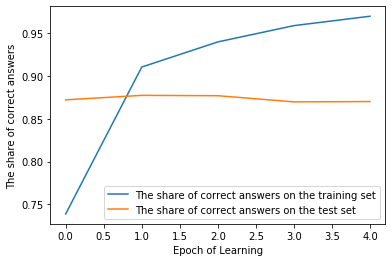

In [26]:
plt.plot(history.history['accuracy'], 
         label='The share of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The share of correct answers on the test set')
plt.xlabel('Epoch of Learning')
plt.ylabel('The share of correct answers')
plt.legend()
plt.show()

In [27]:
scores = model.evaluate(X_test, y_test, verbose=1)

782/782 [==============================] - 5s 7ms/step - loss: 0.4721 - accuracy: 0.8505


In [28]:
print("Percentage of correct answers on test data:", round(scores[1] * 100, 4))

Percentage of correct answers on test data: 85.052
